In [1]:
import numpy as np
import matplotlib.pyplot as plt


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 20
SMALL_SIZE = 12
SSSMALL_SIZE = 6

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 

4. Usando la calculadora cósmica http://www.astro.ucla.edu/~wright/CosmoCalc.html encuente el modulo de la distancia 
    $$m-M= 5log\left(\frac{D_L}{1Mpc}\right)+25$$
    
    Grafique la $D_a$ y $D_L$ y el modulo de la distancia para el intevalo de z[0,3] para los modelos cosmologicos sugeridos

In [2]:
#usando la calculadora cosmica se obtuvieron D_a y D_l y se guardaron en un archivo para los dos modelos sugeridos
M1=np.loadtxt('./model1.dat')
z1=M1[:,0]
Da1=M1[:,1]
Dl1=M1[:,2]

M2=np.loadtxt('./model2.dat')
z2=M2[:,0]
Da2=M2[:,1]
Dl2=M2[:,2]

print(z1)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]


In [3]:
module1=5*np.log10(Dl1/1)+25

module2=5*np.log10(Dl2/1)+25


model1=np.savetxt('Module_distance1.dat',np.c_[z1,Da1,Dl1,module1],fmt='%2.2f',header=('z,Da,dL,DistanceModule'))
jj=z1==1


model2=np.savetxt('Module_distance2.dat',np.c_[z2,Da2,Dl2,module2],fmt='%2.2f',header=('z,Da,dL,DistanceModule'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


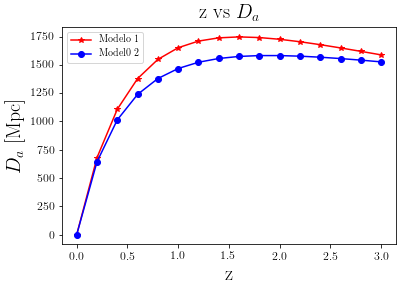

In [4]:
#graficas Da

plt.plot(z1,Da1,marker='*',label='Modelo 1',c='r')
plt.plot(z2,Da2,marker='o',label='Model0 2',c='b')
plt.title(r'D_a vs $z$')
plt.xlabel('z')
#plt.yscale('log')
plt.ylabel(r'$D_a$ [Mpc]')
plt.legend()
#plt.grid()

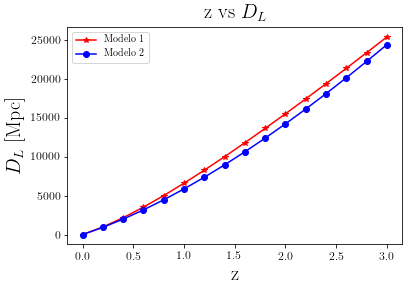

In [5]:
#graficas Dl

plt.plot(z1,Dl1,marker='*',label='Modelo 1',c='r')
plt.plot(z2,Dl2,marker='o',label='Modelo 2',c='b')
plt.title(r'D_L$ vs z')
plt.xlabel('z')
#plt.yscale('log')
plt.ylabel('$D_L$ [Mpc]')
plt.legend()
#plt.grid()


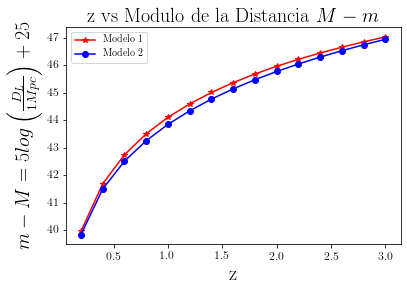

In [6]:
#graficas m-M

plt.plot(z1,module1,marker='*',label='Modelo 1',c='r')
plt.plot(z2,module2,marker='o',label='Modelo 2',c='b')
plt.title(r'z vs Modulo de la Distancia $M-m$')
plt.xlabel('z')
plt.ylabel(r'$m-M=5log\left(\frac{D_L}{1Mpc}\right)+25$')
#plt.xscale('log')
plt.legend()
#plt.grid()


5. Consideremos la escritura de las ecuaciones de Friedmann

$$\dot{a}= 1+\Omega_{m0}\left(\frac{1}{a} -1 \right) + \Omega_{\Lambda 0}(a^2 -1) + \Omega_{r0} \left(\frac{1}{a^2}-1\right)$$


con $a(0)=1$ Una forma alternativa es convertir este sistema en un sistema de segundo orden, el cual queda escrito de la forma:

$$\ddot{a}= -\frac{\Omega_{m0}}{2a^2} + \Omega_{\Lambda 0} a - \frac{\Omega_{r0}}{a^3}$$

con $a(0)=1$ y $\dot{a}(0)=1$. con ayuda de un integrador numérico, construya un programa para integrar el sistema y así poder estudiar las diferentes soluciones cosmológicas



Modelo 1 =$\Omega_m=0.3$, $\Omega_\Lambda=0.7$ 

Modelo 2 =$\Omega_m=1$, $\Omega_\Lambda=0$ (Modelo Einstein de Sitter) 

Modelo 3= $\Omega_m=0.9$, $\Omega_\Lambda=0.1$ 

Modelo 4= $\Omega_m=1.1$, $\Omega_\Lambda=-0.1$ 

Modelo 5= $\Omega_m=0.3$, $\Omega_\Lambda=0.0$ 



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in power
  # Remove the CWD from sys.path while we load stuff.


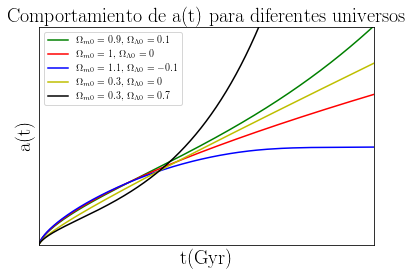

In [10]:
H = 70
Mpc = 3.085677581e19
km = 1.0
Gyr = 3.1536e16
H0 = (H * Gyr * km/Mpc)



tP=np.arange(0,8,0.011)
aP=((3/2)*tP)**(2/3)#solución exacta Einstein-DeSitter



Ea=np.loadtxt('modelo3.dat')#modelo3
a=Ea[:,1]
t=Ea[:,0]

Ea2=np.loadtxt('modelo2.dat')#modelo2
a2=Ea2[:,1]
t2=Ea2[:,0]



Ea3=np.loadtxt('modelo4.dat')#modelo4
a3=Ea3[:,1]
t3=Ea3[:,0]


Ea4=np.loadtxt('modelo5.dat')#modelo4
a4=Ea4[:,1]
t4=Ea4[:,0]

Ea5=np.loadtxt('modelo1.dat')#modelo1
a5=Ea5[:,1]
t5=Ea5[:,0]


plt.plot(a/H0,t,c='g',  label='$\Omega_{m0}=0.9$,  $\Omega_{\Lambda0}=0.1$')#modelo3
plt.plot(a2/H0,t2,c='r',label='$\Omega_{m0}=1$,   $\Omega_{\Lambda0}=0$')#modelo2
plt.plot(a3/H0,t3,c='b',label='$\Omega_{m0}=1.1$, $\Omega_{\Lambda0}=-0.1$')#modelo4
plt.plot(a4/H0,t4,c='y',label='$\Omega_{m0}=0.3$, $\Omega_{\Lambda0}=0$')#modelo5
plt.plot(a5/H0,t5,label='$\Omega_{m0}=0.3$, $\Omega_{\Lambda0}=0.7$',c='k')#modelo1

plt.legend()
plt.title('Comportamiento de a(t) para diferentes universos')
plt.xlabel('t(Gyr)')
plt.ylabel('a(t)')
plt.ylim(0,5,0.1)
plt.xlim(0,60,0.1)
# Turn off tick labels
plt.yticks([])
plt.xticks([])
plt.grid()

#plt.plot(tP,aP)
